In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv("student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [103]:
df.shape

(649, 33)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [105]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [106]:
#no null values
#univariate analysis
df['school'].value_counts(normalize=True)*100

school
GP    65.177196
MS    34.822804
Name: proportion, dtype: float64

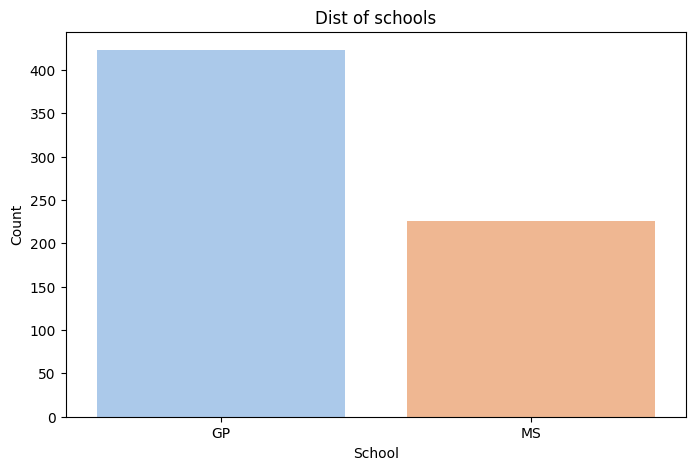

In [107]:
plt.figure(figsize=(8,5))
sns.countplot(x='school', data =df, palette= 'pastel')
plt.title('Dist of schools')
plt.xlabel('School')
plt.ylabel('Count')
plt.show()

In [108]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

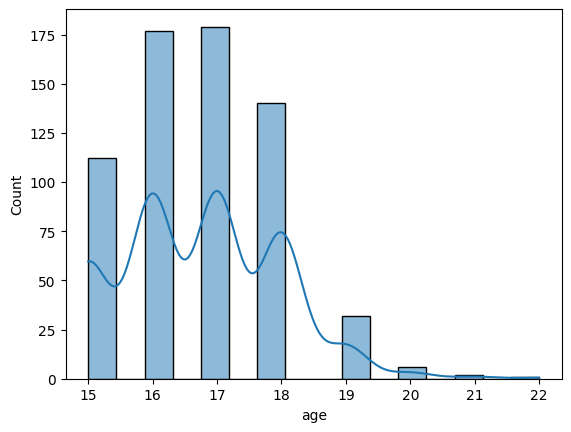

In [109]:
sns.histplot(df['age'], kde =True)

In [110]:
#most students are 16-17 age -- skewed dist

<Axes: xlabel='address', ylabel='count'>

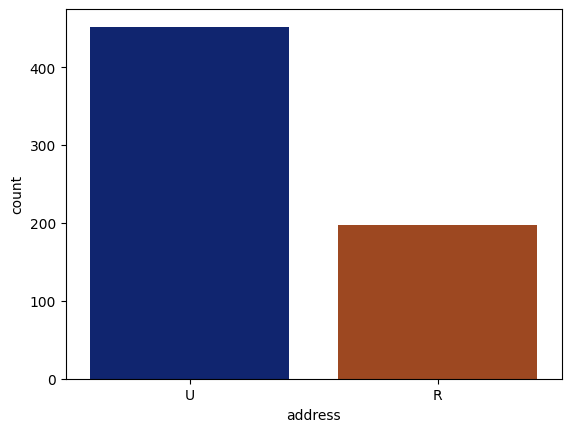

In [111]:
sns.countplot(x='address', data=df, palette= 'dark')

In [112]:
#most students are from urban region

In [113]:
df['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [114]:
df['reason'].value_counts(normalize=True)*100

reason
course        43.913713
home          22.958398
reputation    22.033898
other         11.093991
Name: proportion, dtype: float64

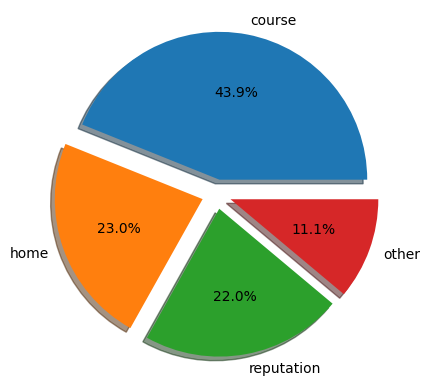

In [115]:
reason = df['reason'].value_counts()
plt.pie(reason, labels=reason.index, autopct='%1.1f%%', shadow=True, explode= (0.1,0.1,0.1,0.1))
plt.show()

In [116]:
df['activities'].value_counts()

activities
no     334
yes    315
Name: count, dtype: int64

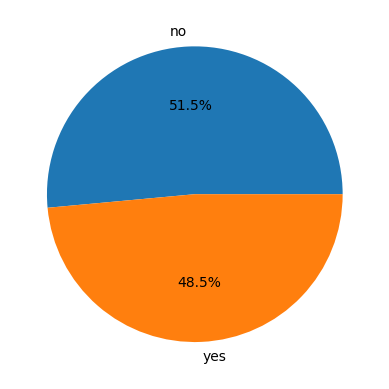

In [117]:
activities = df['activities'].value_counts()
plt.pie(activities, labels=activities.index, autopct='%1.1f%%')
plt.show()

In [118]:
#48.5% are participative

In [119]:
df['Walc'].value_counts()

Walc
1    247
2    150
3    120
4     87
5     45
Name: count, dtype: int64

In [120]:
df['Dalc'].value_counts()

Dalc
1    451
2    121
3     43
5     17
4     17
Name: count, dtype: int64

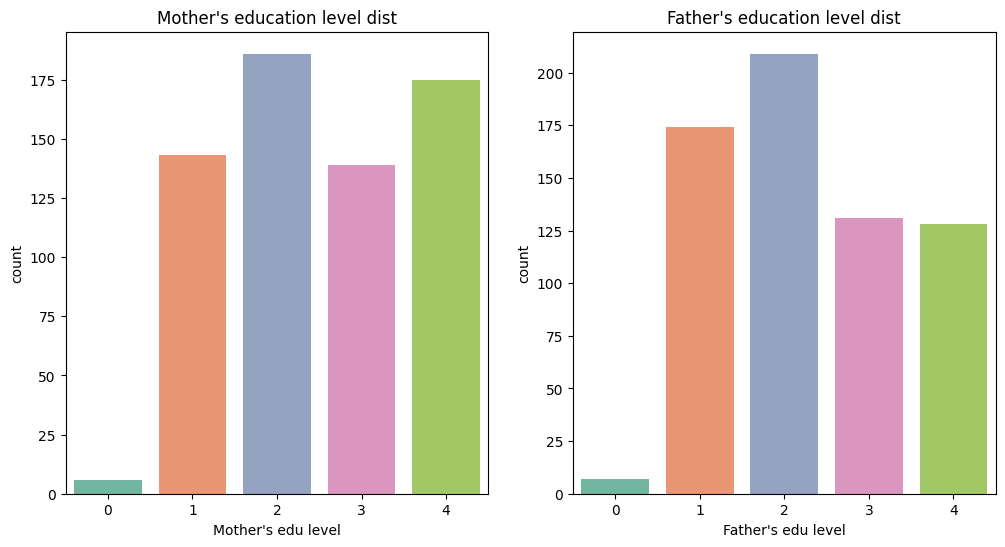

In [121]:
#bivariate analysis
#mother and father edu
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x= 'Medu', data=df, palette= 'Set2')
plt.xlabel("Mother's edu level")
plt.ylabel("count")
plt.title("Mother's education level dist")

plt.subplot(1,2,2)
sns.countplot(x= 'Fedu', data=df, palette= 'Set2')
plt.xlabel("Father's edu level")
plt.ylabel("count")
plt.title("Father's education level dist")
plt.show()



In [122]:
#mothers are more educated in terms of education than fathers

<Axes: xlabel='studytime', ylabel='G3'>

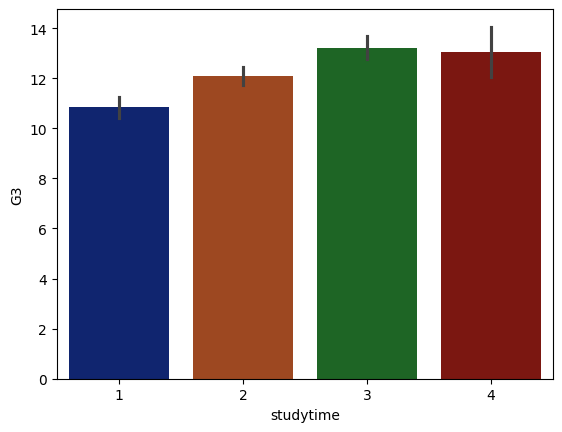

In [123]:
sns.barplot(x='studytime',y= 'G3', data=df, palette='dark')
#study for 3 hrs -- get 12+ marks in g3

In [124]:
df.G3.value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
8      35
9      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

<Axes: xlabel='internet', ylabel='G3'>

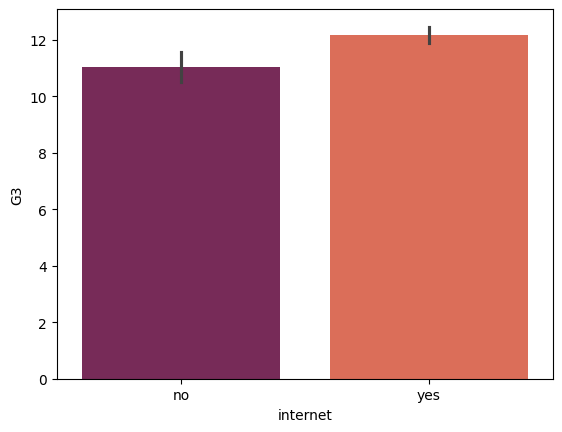

In [125]:
sns.barplot(x='internet',y= 'G3', data=df, palette='rocket')
#internet users get more marks in g3

<Axes: xlabel='sex', ylabel='G3'>

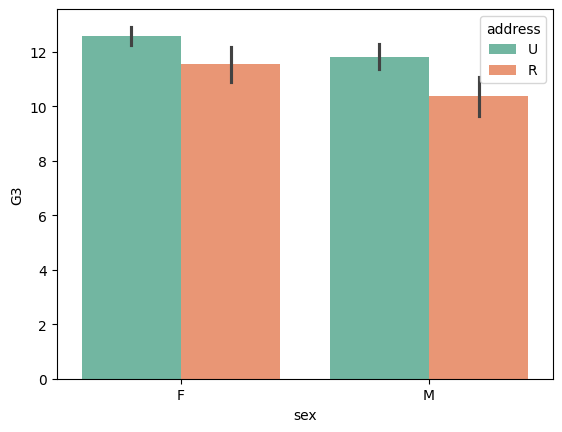

In [126]:
#multivariate analysis
sns.barplot(x= 'sex', y='G3', hue= 'address',data=df, palette='Set2')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'age'),
  Text(1, 0, 'traveltime'),
  Text(2, 0, 'studytime'),
  Text(3, 0, 'absences'),
  Text(4, 0, 'G1'),
  Text(5, 0, 'G2'),
  Text(6, 0, 'G3')])

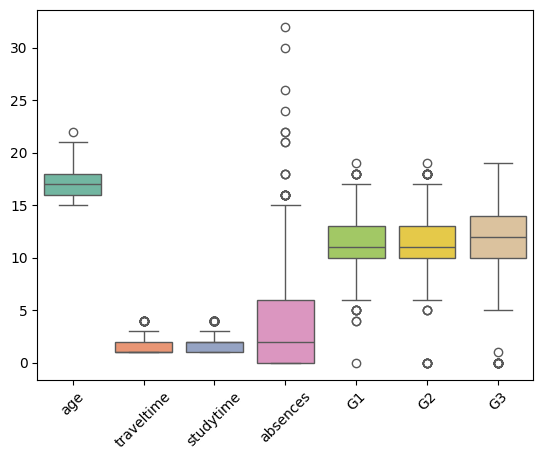

In [127]:
num_col=['age', 'traveltime', 'studytime', 'absences', 'G1', 'G2', 'G3']

sns.boxplot(data= df[num_col], palette='Set2')
plt.xticks(rotation=45)

In [128]:
#some insights -- median age is 17yrs
#median marks scored in G! and G2 are same
#outliers are present

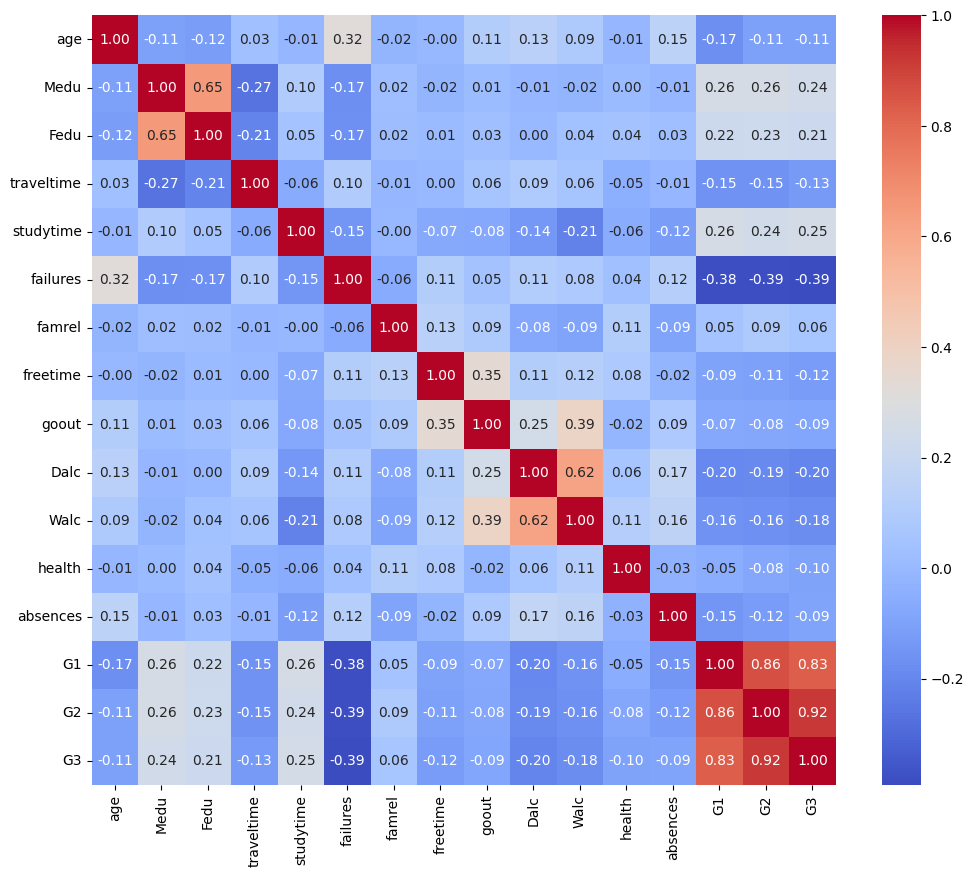

In [129]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
#strong positive corr between G1 and G2
#strong negative corr bw failures and marks in g1 and g2 and g3
#positive correlation bw mother edu and marks in g1, g2 and g3
#positive correlation bw study time and marks in g1, g2 and g3

In [131]:
#outliers detection

student_grades_df= df.copy()
student_grades_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [132]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in num_col:
    student_grades_df = remove_outliers(student_grades_df, col)
student_grades_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [133]:
X, y = student_grades_df.iloc[:, :-1], student_grades_df.iloc[:, -1]

In [134]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,6,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [135]:
y

1      11
2      12
3      14
4      13
5      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 544, dtype: int64

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((408, 32), (136, 32), (408,), (136,))

In [138]:
student_grades_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#encoding categorical variables
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
478,1,0,16,0,0,1,1,1,0,2,...,0,3,4,3,1,1,1,0,7,7
418,0,1,18,0,0,1,2,3,2,3,...,0,3,1,3,4,5,4,13,13,14
449,1,0,15,0,0,1,1,2,2,3,...,0,5,1,2,1,1,1,3,11,13
7,0,0,17,1,0,0,4,4,2,4,...,0,4,1,4,1,1,1,2,10,13
12,0,1,15,1,1,1,4,4,1,3,...,0,4,3,3,1,3,5,0,12,13
